In [2]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
plt.rcParams["font.family"] = 'Malgun Gothic'

# 11장 시계열(time series)
* 금융, 경제, 생태학, 신경 과학, 서버 로그 데이터 분석 등 분야에서 사용되는 구조화된 데이터
* 시간상의 여러 지점을 관측하거나 측정할수 있는 모든 것
* 시간 내에서 특정 순간의 타임스탬프로 색인된 데이터

## 1. datetime 모듈의 자료형
* datetime: 날짜와 시간을 함께 나타내는 자료형
* date: 날짜(연, 월, 일)만을 나타내는 자료형
* time: 시간만을 나타내는 자료형
* timedelta: 두 날짜 또는 시간 사이의 차이를 나타내는 자료형



## 2. datetime의 속성
* year: 년도
* month: 월
* day: 일
* hour: 시간
* minute: 분
* second: 초
* microsecond: 마이크로초

## 3. datetime 자료형의 메서드
* now(): 현재 날짜와 시간을 반환
* today(): 오늘 날짜를 반환

In [4]:
# ex1) datetime 사용법
from datetime import datetime
now = datetime.now()
print(now)
print(type(now)) #datetime 객체 

2024-05-07 15:13:33.395056
<class 'datetime.datetime'>


In [7]:
# ex2) datetime 객체에서 연 월 일 정보 추출(!!!)
now.year
now.month
now.day

7

## 4. timedelta 자료형의 속성
* days: 일
* seconds: 초
* microseconds: 마이크로초

In [8]:
delta =  datetime.now() - datetime(2024, 1, 1)
delta.days

127

## 5. datetime 포맷 규칙
* %Y: 년도 (4자리)
* %m: 월 (2자리)
* %d: 일 (2자리)
* %H: 시간 (24시간제, 2자리)
* %M: 분 (2자리)
* %S: 초 (2자리)


In [11]:
#ex1) datetime객체 -> 문자열 datetime 객체로 변환
stamp = datetime(2024, 5, 6)
type(stamp)

#1)
str(stamp)

#2)
stamp.strftime("%Y-%m-%d")

'2024-05-06'

## 6. 시계열의 종류
* 파이썬 문자열
* datetime 객체로 표현되는 타임스템프로 색인된 Series

In [13]:
# 문자열 -> datetime 날짜로 파싱
value = "2011-01-03"
dt = datetime.strptime(value, "%Y-%m-%d")
type(dt)

datetime.datetime

In [14]:
# 날짜 문자열 리스트 -> datetime으로 파싱
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
dt = pd.to_datetime(datestrs)  #색인으로 사용???...
dt # DatetimeIndex 객체 (중요!!)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [20]:
# 실습> 
datestrs + [None]
idx = pd.to_datetime(datestrs + [None])
idx
idx[0]
pd.isna(idx)

array([False, False,  True])

## 7. 시계열의 색인, 선택, 부분 선택


In [21]:
# (1) datetime 타임스템프로 색인된 Series 객체
dates = [datetime(2024, 5, 2), datetime(2024, 5, 5),
         datetime(2023, 1, 7), datetime(2011, 1, 8),
         datetime(2022, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2024-05-02   -0.204708
2024-05-05    0.478943
2023-01-07   -0.519439
2011-01-08   -0.555730
2022-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [22]:
ts.index # DatetimeIndex

DatetimeIndex(['2024-05-02', '2024-05-05', '2023-01-07', '2011-01-08',
               '2022-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [23]:
# 첫 번째 샘플 추출 : 인덱싱
stamp = ts.index[0]
ts[stamp]

-0.20470765948471295

In [26]:
# 인덱싱 : DatetimeIndex 의 색인 레벨
ts["2024-05-02"]

-0.20470765948471295

In [ ]:
# 슬라이싱 
ts[::2]


### [실습] 가상 시계열 데이터 생성
* pandas.date_range()  
  * pandas 라이브러리의 함수로, 특정 기간 내의 날짜 범위를 생성
  * start: 시작 날짜
  * end: 종료 날짜
  * periods: 생성할 날짜 수
  * freq: 날짜 간격 (기본값: 'D' (하루))

In [29]:
index = pd.date_range("2012-04-01", "2012-06-01")
index = pd.date_range(start="2012-04-01", periods=20)
index = pd.date_range(end="2012-06-01", periods=20)
index

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# ex>  date_range()함수를 이용하여 날짜 시리즈 생성
np.random.seed(1)
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range(start= "2000-01-01", periods=1000))
print(longer_ts.head())
longer_ts["2000-01-01"]
longer_ts["2000"]
longer_ts["2000-05"]

2000-01-01    1.624345
2000-01-02   -0.611756
2000-01-03   -0.528172
2000-01-04   -1.072969
2000-01-05    0.865408
Freq: D, dtype: float64


2000-05-01   -0.775162
2000-05-02    1.273756
2000-05-03    1.967102
2000-05-04   -1.857982
2000-05-05    1.236164
                ...   
2000-05-27    0.618380
2000-05-28    0.232495
2000-05-29    0.682551
2000-05-30   -0.310117
2000-05-31   -2.434838
Freq: D, Length: 31, dtype: float64

In [33]:
longer_ts["2001-05"]

2001-05-01    1.197831
2001-05-02    1.704594
2001-05-03    1.040089
2001-05-04   -0.918440
2001-05-05   -0.105345
                ...   
2001-05-27    0.169869
2001-05-28   -1.164008
2001-05-29    0.693366
2001-05-30   -0.758067
2001-05-31   -0.808847
Freq: D, Length: 31, dtype: float64

In [39]:
# ex> 시계열 데이터프레임 생성(!!)
dates = pd.date_range("2000-01-01", periods=10, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((10, 4)), #periods의 수와 괄호안의 앞의 숫자를 통일 시켜야함
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])
long_df
long_df.loc["2000-01"]

,Colorado,Texas,New York,Ohio
2000-01-05,0.627177,0.162808,0.288617,0.058307
2000-01-12,1.631936,-0.401789,-0.199939,0.007389
2000-01-19,0.275664,-1.763250,1.387974,0.226200
2000-01-26,0.569125,0.197316,-0.186441,-0.355242


In [40]:
long_df.index

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08'],
              dtype='datetime64[ns]', freq='W-WED')

In [41]:
# grouping
grouped = long_df.groupby(level=0) #groupby객체
#각 그룹별 이름과 데이터를 출력
for n, g in grouped:
  print(f"name : {n}")
  print(g)
  print()


name : 2000-01-05 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-05  0.627177  0.162808  0.288617  0.058307

name : 2000-01-12 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-12  1.631936 -0.401789 -0.199939  0.007389

name : 2000-01-19 00:00:00
            Colorado    Texas  New York    Ohio
2000-01-19  0.275664 -1.76325  1.387974  0.2262

name : 2000-01-26 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-26  0.569125  0.197316 -0.186441 -0.355242

name : 2000-02-02 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-02  0.096114  0.152052  1.155262  0.346058

name : 2000-02-09 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-09 -0.133489  1.986565 -1.279426 -1.340209

name : 2000-02-16 00:00:00
            Colorado     Texas  New York     Ohio
2000-02-16  0.354602 -0.212373 -1.774596 -0.31223

name : 2000-02-23 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-23 -0.710656

In [45]:
# groupby()에 의한 메소드 대표적으로 mean(), std(), count(), size(), min(), max(), sum()이 있다
grouped.mean()
grouped.count()  #각 그룹에 속하는 컬럼별 데이터포인터의 개수
grouped.size()  #각 그룹에 속하는 샘플 (데이터포인터)의 개수


2000-01-05    1
2000-01-12    1
2000-01-19    1
2000-01-26    1
2000-02-02    1
2000-02-09    1
2000-02-16    1
2000-02-23    1
2000-03-01    1
2000-03-08    1
Freq: W-WED, dtype: int64

## [실습] 시계열 데이터셋 로딩

In [46]:
# ex > 시계열 데이터셋 파일 -> 시계열 색인을 갖는 데이터프레임 객체로 변환
# index_col= 0 
close_px_all = pd.read_csv("examples/stock_px.csv", parse_dates=True, index_col= 0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [47]:
close_px_all.columns #과제에서 항상 저 문장이 필요함  # AAPL: Apple Inc, MSFT: Microsoft Corporation, XOM: Exxon Mobil Corporation, SPX: S&P 500 Index


Index(['AAPL', 'MSFT', 'XOM', 'SPX'], dtype='object')

In [48]:
# 인덱싱
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

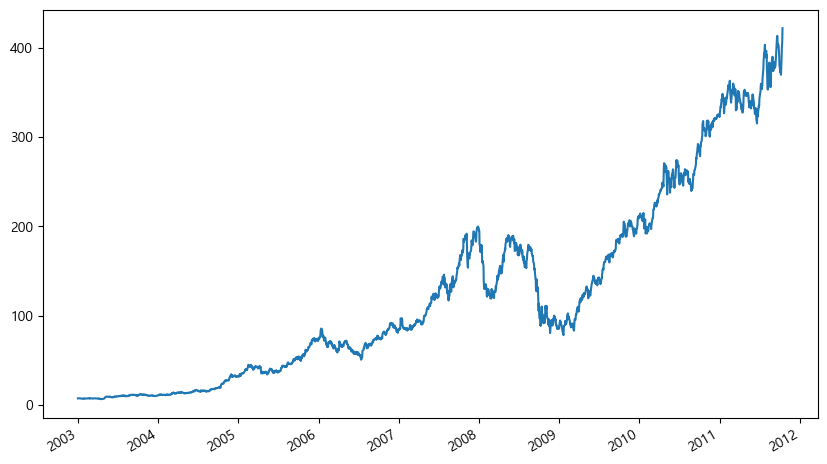

In [49]:
# 시각화 방법 
#(1) line plots
# close_px["AAPL"].plot.bar()

close_px["AAPL"].plot(kind='line')

### < pandas.rolling() 메서드>  !!!!!!!!!!!
* pandas 라이브러리의 함수로, 특정 기간 동안의 데이터를 그룹화하여 통계를 계산
* 롤링창은 시계열 데이터 분석에 매우 중요
* 롤링창을 사용하여 데이터 변화 추세, 변동성 측정, 이상치 감지, 예측에 사용
* 롤링창을 사용하여 롤링창 내의 데이터 평균, 표준편차, 최대값/최소값, 회귀분석 등
* rolling() 함수의 인자:
  * window: 그룹화할 데이터의 수
  * min_periods: 계산에 포함할 최소 데이터 수 (기본값: window)
  * center: 그룹화할 데이터의 중심을 맞출지 여부 (기본값: False)
  * win_type: 그룹화할 데이터의 가중치 (기본값: None)


<bound method Rolling.mean of Rolling [window=250,center=False,axis=0,method=single]>


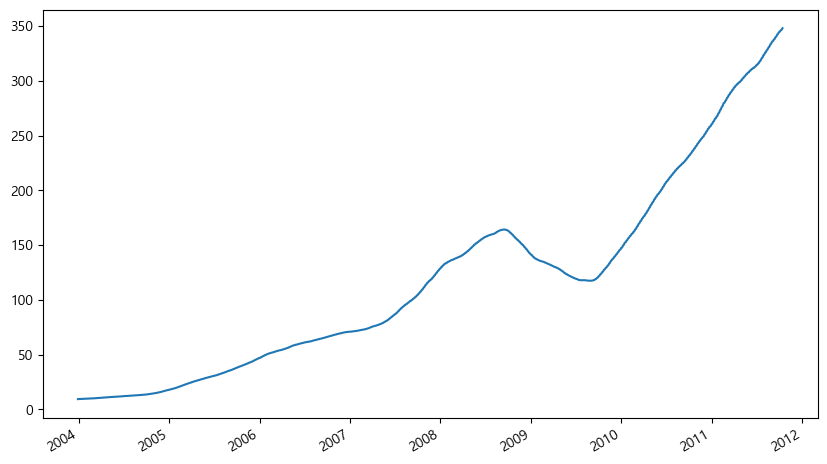

In [52]:
# (1)  롤링창 만들어 통계 계산
# DataFrame의 "AAPL" 열에 대한 rolling() 메서드를 사용하여 크기가 250인 롤링 창을 만드는 방법:
#close_px["AAPL"].rolling(250)
# 롤링 창 사용하기: 롤링 창을 만들면 다양한 통계 함수를 사용하여 창 내의 데이터를 분석
print(close_px["AAPL"].rolling(250).mean)

#Line plots
plt.figure() #도화지 1개에 그림 1개가 들어가는 것
close_px["AAPL"].rolling(250).mean().plot(kind="line")
plt.show()


<Axes: >

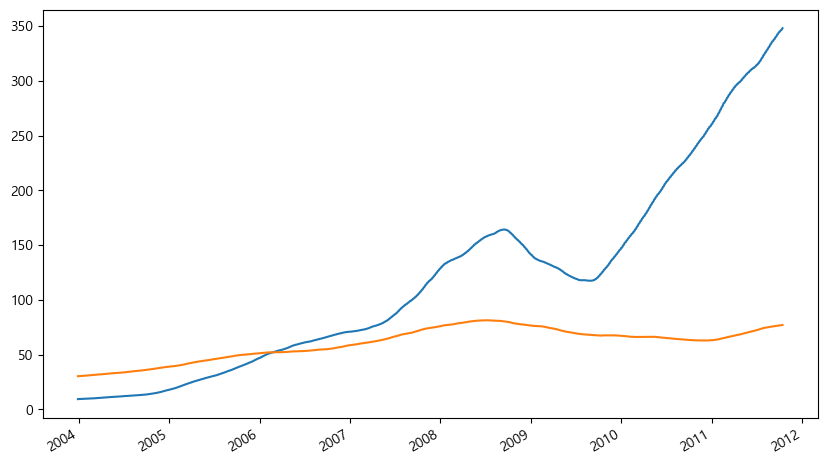

In [53]:
# (2) 롤링창 만들어 통계 계산 - 2 개의 종가에 대한 250일 롤링 평균 계산
plt.figure()
close_px["AAPL"].rolling(window = 250).mean().plot()
close_px["XOM"].rolling(window = 250).mean().plot()



<Axes: >

<Figure size 1000x600 with 0 Axes>

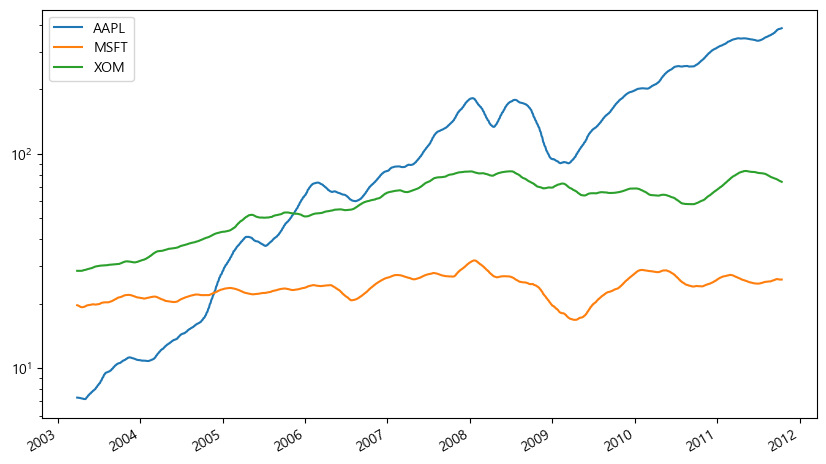

In [54]:
# (3) 롤링창 만들어 통계 계산 - 모든 종목의 종가에 대한 60일 롤링 평균 계산:
# 2. 60일 롤링 평균을 로그 스케일로 플롯: y축이 로그 스케일로 플롯
plt.figure()
close_px.rolling(60).mean().plot(logy=True)


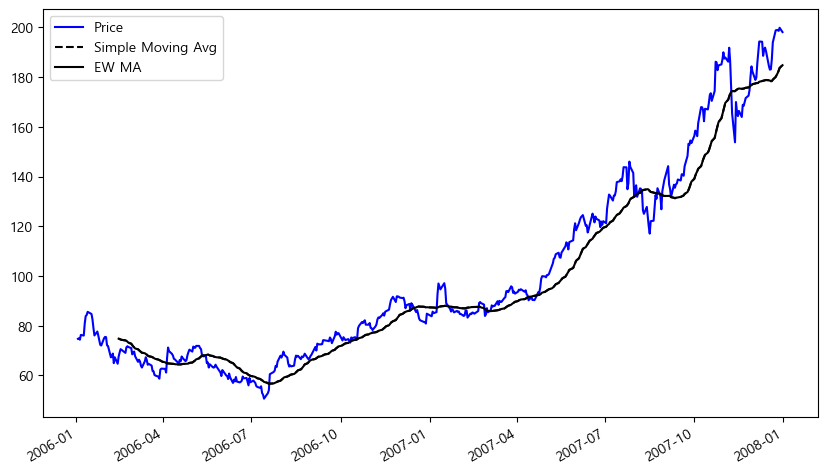

In [57]:
# # Create a figure
plt.figure()
# Select the desired date range for AAPL stock prices
aapl_px = close_px["AAPL"]["2006":"2007"]
# Calculate the 30-day simple moving average
ma30 = aapl_px.rolling(30).mean() 
ewma30 = aapl_px.rolling(30).mean()
# Plot the AAPL stock prices : sets the line style to solid (-) and the color to blue (b).

aapl_px.plot(style="b-", label="Price")  #b는 blue 
# Plot the 30-day simple moving average
ma30.plot(style="k--", label="Simple Moving Avg")
# Plot the 30-day exponential moving average
ewma30.plot(style="k-", label="EW MA")
plt.legend()
plt.show()